# 🌟 Convolutional Neural Networks (CNNs) for Image Classification with TensorFlow 2 and Keras

## 🔍 What is a CNN?

A **Convolutional Neural Network (CNN)** is a specialized type of deep learning neural network designed to process and classify structured grid-like data, such as images. CNNs are particularly effective for tasks like image classification, object detection, and facial recognition.

### 🎯 Key Concepts:
- **Convolutional Layers**: Apply filters to input images to extract features like edges, textures, or patterns.
- **Pooling Layers**: Reduce spatial dimensions (downsampling) to decrease computation and prevent overfitting.
- **Fully Connected Layers**: Combine extracted features for final classification.
- **Activation Functions**: Introduce non-linearity (e.g., ReLU, Sigmoid).
- CNNs are inspired by the human visual system and excel at capturing **spatial hierarchies** in data.

## 🧠 Why CNNs for Images?
- Unlike MLPs, CNNs exploit **local spatial correlations** in images, making them more efficient.
- They require fewer parameters due to **weight sharing** in convolutional filters.
- They are robust to translations and distortions in images.

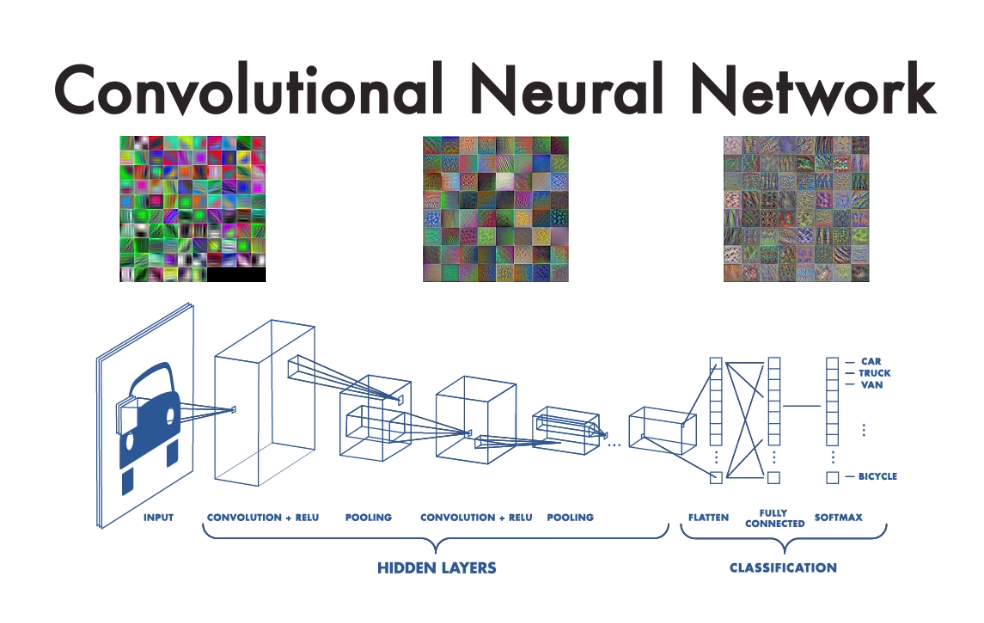

## 🖼️ Simple CNN Architecture
```text
Input Image → [Conv + ReLU → Pooling] → [Conv + ReLU → Pooling] → Flatten → Dense → Output
     |            Feature Extraction           |         Classification         |
   Pixels         Edges, Textures             High-level Features        Predictions
```
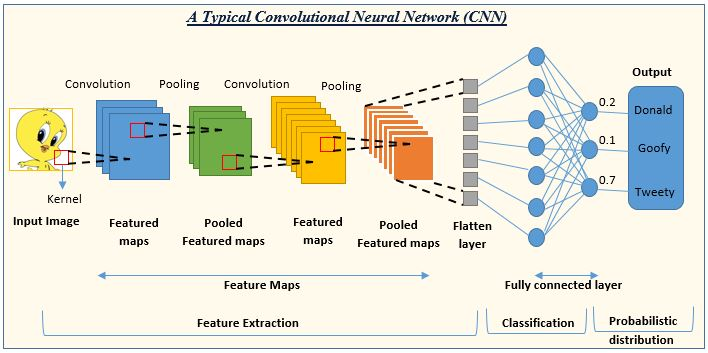


## 🔧 Libraries We Need

We'll use TensorFlow/Keras for building the CNN, NumPy for data manipulation, and Matplotlib for visualizations.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 📊 Dataset: CIFAR-10

The **CIFAR-10** dataset contains 60,000 32x32 color images in 10 classes (e.g., airplane, car, bird). We'll use it to demonstrate CNN-based image classification.

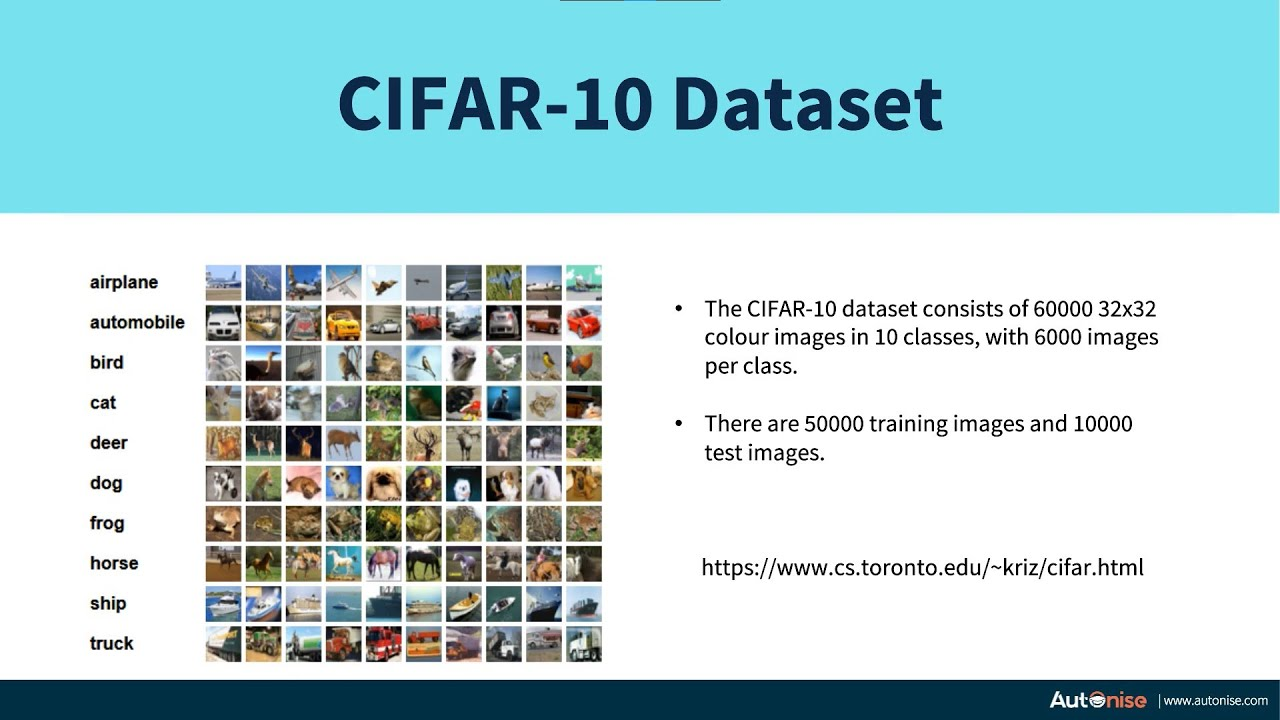

### 🖼️ Visualizing the Data

In [ ]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Class names for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Visualize some samples
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.suptitle('CIFAR-10 Sample Images')
plt.show()

## 🔄 Preprocessing

- **Normalize pixel values**: Scale pixel values to [0, 1] for faster convergence.
- **One-hot encode labels**: Convert class labels to categorical format.
- **Split data**: Use train/test split (already provided by CIFAR-10).

In [ ]:
# Normalize pixel values
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

## 🏗️ Build the CNN Model

We'll create a simple CNN with:
- 2 convolutional layers with ReLU activation and max pooling.
- A flatten layer to transition to dense layers.
- Dense layers for classification with dropout to prevent overfitting.
- Softmax output for 10-class classification.

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

## 🚀 Train the Model

We'll train the model for 20 epochs with a batch size of 64, using the test set for validation.

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, 
                    validation_data=(X_test, y_test))

## 📈 Plot Training History

Visualize the training and validation accuracy/loss over epochs to assess model performance.

In [ ]:
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 🔍 Final Evaluation

Evaluate the model on the test set to get the final accuracy.

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

## 🖼️ Visualize Predictions

Let's visualize some test images along with their predicted and true labels.

In [ ]:
# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Plot some predictions
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_test[i])
    plt.title(f'Pred: {class_names[y_pred_classes[i]]}\nTrue: {class_names[y_test_classes[i]]}')
    plt.axis('off')
plt.suptitle('CNN Predictions on CIFAR-10 Test Set')
plt.show()

## 🧠 What Did the CNN Learn?

- The CNN learned to extract **low-level features** (edges, corners) in early layers and **high-level features** (object parts, shapes) in deeper layers.
- Pooling layers reduced spatial dimensions, making the model invariant to small translations.
- Dropout helped prevent overfitting by randomly disabling neurons during training.

## 📌 Key Takeaways
- CNNs are **powerful** for image-related tasks due to their ability to learn spatial hierarchies.
- They are more **parameter-efficient** than MLPs for image data.
- Proper preprocessing (normalization, one-hot encoding) is critical for performance.
- Visualizing results helps understand model behavior.

## ✅ Next Steps
Experiment with:
- Adding more convolutional/pooling layers.
- Changing the number of filters (e.g., 32, 64, 128).
- Trying different optimizers (e.g., SGD, RMSprop).
- Using data augmentation to improve generalization.

Try these changes and observe how they impact accuracy and training time!